<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will explore the application of Convolutional Neural Networks (CNNs) and gain a better understanding of their functionality and capabilities.

Our goal in this notebook is to solve the well-known problem of [MNIST](https://www.tensorflow.org/datasets/catalog/mnist?hl=es-419) using CNNs.

# Prepare the document and get the data

In [3]:
# import the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# get the data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# know our data

print(f"Train data has {x_train.shape[0]} observations and test data has {x_test.shape[0]}.")
print(f"The shape of our input features is {x_train.shape[1:]}.")
print(f"\nA sample of the label is {y_train[3]}.")

Train data has 60000 observations and test data has 10000.
The shape of our input features is (28, 28).

A sample of the label is 1.


In [6]:
# create a function to show a sample of the images

def show_im(images):

  fig = plt.figure(figsize = (8,8))
  index = np.random.randint(low = 0, 
                            high = len(images),
                            size = 100)
  
  for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.axis("off")
    plt.imshow(images[index[i]], cmap = "gray")  

  plt.show()

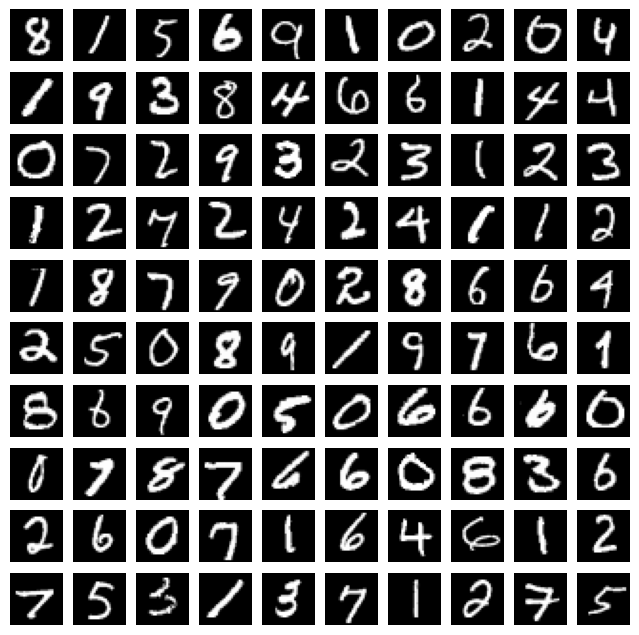

In [7]:
# show a sample of the train data

show_im(x_train)


The color values of each pixel in our image range from 0 to 255. To optimize our computations, we can normalize these values to a smaller range.


In [8]:
# normalize the data

x_train = x_train / 255
x_test = x_test / 255

# see a sample after the normalization

x_train[1][4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2       , 0.62352941, 0.99215686, 0.62352941, 0.19607843,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Creating the CNN

Let's start by creating our CNN model. We will be using the Keras library to build our model.

In [9]:
# create the model

model = tf.keras.Sequential(name = "My_first_CNN")

# add the first layer

model.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (5,5),
    padding = "same",
    activation = "relu", 
    input_shape = (28,28,1),
    name = "First_convolutional"
))

In [10]:
model.summary()

Model: "My_first_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_convolutional (Conv2D  (None, 28, 28, 32)       832       
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [11]:
# add the pooling layer

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "same",
    name = "First_pooling"
))

In [12]:
model.summary()

Model: "My_first_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_convolutional (Conv2D  (None, 28, 28, 32)       832       
 )                                                               
                                                                 
 First_pooling (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [13]:
# add the second convolutional and the second 

model.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (5,5),
    padding = "same",
    activation = "relu", 
    name = "Second_convolutional"
))

In [14]:
# add flatten layer to work with the dense layers

model.add(tf.keras.layers.Flatten(
    name = "Flatten_layer"
))

# add the dense layers 

model.add(tf.keras.layers.Dense(20, activation = "relu", name = "First_dense"))

model.add(tf.keras.layers.Dense(10, activation = "softmax", name = "Second_dense"))

In [15]:
# see the final result

model.summary()

Model: "My_first_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_convolutional (Conv2D  (None, 28, 28, 32)       832       
 )                                                               
                                                                 
 First_pooling (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 Second_convolutional (Conv2  (None, 14, 14, 32)       25632     
 D)                                                              
                                                                 
 Flatten_layer (Flatten)     (None, 6272)              0         
                                                                 
 First_dense (Dense)         (None, 20)                125460    
                                                      

# Training the CNN

Now that we have defined our CNN architecture, we can train our model on the MNIST dataset. We will use the fit() method from Keras to train our model.

First, we need to compile the model and specify the loss function, optimizer, and evaluation metric. We will use categorical cross-entropy as our loss function, Adam as our optimizer, and accuracy as our evaluation metric.

Then, we will train the model for a specified number of epochs, which we will set to 10 for this example. During training, the model will iterate over the training data in batches and update the weights of the network based on the gradient of the loss function.

In [16]:
# define the optimizer and compile the model

opt = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

model.compile(
    optimizer = opt,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [17]:
# train the model 

hist = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 36,
    epochs = 10,
    validation_data = (x_test, y_test)
)

Epoch 1/10
1667/1667 [==============================] - 23s 6ms/step - loss: 0.1609 - accuracy: 0.9511 - val_loss: 0.0441 - val_accuracy: 0.9856
Epoch 2/10
1667/1667 [==============================] - 11s 6ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 3/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 4/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 5/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0313 - val_accuracy: 0.9909
Epoch 6/10
1667/1667 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0304 - val_accuracy: 0.9914
Epoch 7/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0365 - val_accurac

# Evaluating the model

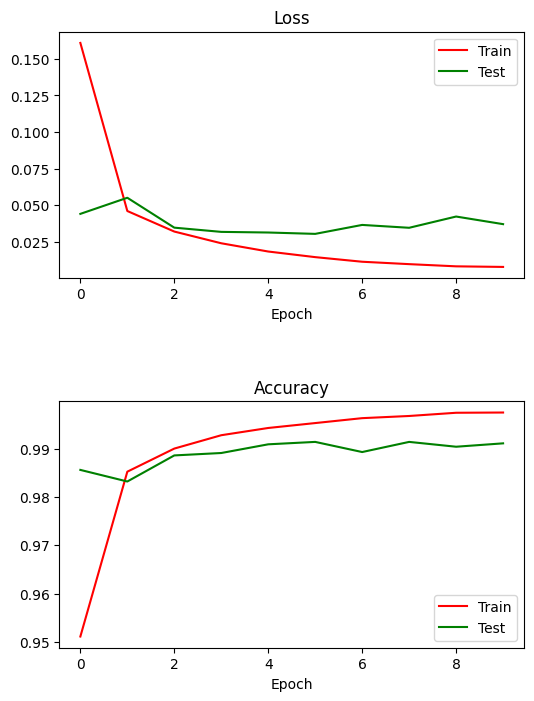

In [18]:
# see the loss and the accuracy of the model

fig = plt.figure(figsize = (6,8))

fig.add_subplot(2,1,1)
plt.plot(hist.history["loss"], color = "red", label = "Train")
plt.plot(hist.history["val_loss"], color = "green", label = "Test")
plt.legend(loc = "upper right")
plt.xlabel("Epoch")
plt.title("Loss")

fig.add_subplot(2,1,2)
plt.plot(hist.history["accuracy"], color = "red", label = "Train")
plt.plot(hist.history["val_accuracy"], color = "green", label = "Test")
plt.legend(loc = "lower right")
plt.xlabel("Epoch")
plt.title("Accuracy")

plt.subplots_adjust(wspace = 0.5,
                    hspace = 0.5)

plt.show()

In [34]:
# create a function to see a sample of a photo with its prediction

def show_pred(images):

  index = np.random.randint(low = 0,
                            high = len(images),
                            size = 25)
  predict = model.predict(images[index])
  numberpred = predict.argmax(axis = 1)

  fig = plt.figure(figsize = (8,8))

  for i in range(len(index)):

    fig.add_subplot(5, 5, i+1)
    plt.axis("off")
    plt.imshow(images[index[i]],
               cmap = "gray"
    )

    plt.title(f"Class predicted: {numberpred[i]}", 
              fontsize = 10)

  plt.show()

1/1 [==============================] - 0s 18ms/step


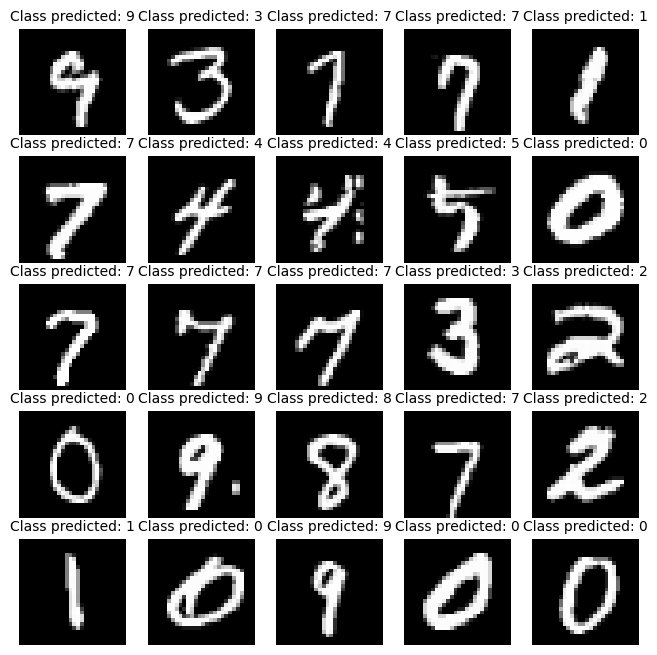

In [36]:
# see a sample of the predictions

show_pred(x_test)

In [55]:
# see how many good predictions we made

predict_label = model.predict(x_test)
predict_onelabel = predict_label.argmax(axis = 1)

real_label = y_test

good_predicts = len(np.where(predict_onelabel == real_label)[0])
bad_predicts = len(predict_label) - good_predicts

print(f"We have {good_predicts} good predictions and {bad_predicts} bad predictions.")
print(f"That represents a {(good_predicts / (good_predicts + bad_predicts))*100}% of accuracy.")

313/313 [==============================] - 1s 2ms/step
We have 9911 good predictions and 89 bad predictions.
That represents a 99.11% of accuracy.


1/1 [==============================] - 0s 21ms/step


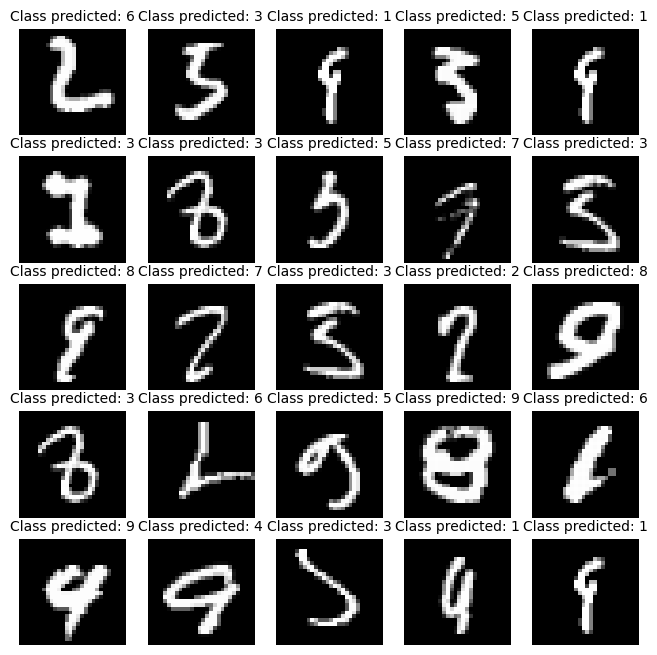

In [63]:
# see some of those bad predictions

bad_predicts = np.where(predict_onelabel != real_label)

show_pred(x_test[bad_predicts])

It is apparent that some of the labels in the MNIST dataset are difficult to classify even for humans, because of poor handwriting.

# Conclusions

In this notebook, we explored the application of Convolutional Neural Networks (CNNs) on the MNIST dataset. We created a CNN model using Keras, and trained it on the MNIST dataset.

After training, we evaluated the performance of our model using the test set and achieved a high accuracy of around 99%. However, we also observed that some of the labels in the dataset were difficult to classify even for humans, and this posed a challenge for our machine learning model as well.

Overall, CNNs are a powerful tool for image classification tasks, and with further tuning and optimization, they can achieve even higher accuracy rates.